## Menentukan Pertanyaan Bisnis

Olist adalah platform yang menghubungkan penjual dengan berbagai marketplace. Penjual merupakan elemen inti dari ekosistem Olist, di mana platform ini membantu memfasilitasi penjualan produk. Penjual menyediakan produk yang ingin dipasarkan, sementara Olist menyediakan platform untuk pemasaran termasuk logistik untuk memudahkan proses penjualan.

 Keberhasilan bisnis di Olist sangat tergantung pada para penjual. Oleh karena itu Tim Marketing Olist Store perlu meyakinkan penjual bahwa Olist adalah pilihan yang baik untuk memasarkan produk mereka.

- Berapa banyak penjual (seller) yang telah bergabung dengan Olist?
- Berapa banyak jenis produk yang telah dipasarkan melalui Olist?
- Berapa banyak state dan city yang telah dijangkau oleh Olist dalam melayani pelanggan?
- Berapa rata-rata ulasan (review) yang diterima oleh Olist dari pelanggan?
- Bagaimana total transaksi yang terjadi di Olist berdasarkan tahun?
- Bagaimana total pendapatan (revenue) yang diperoleh Olist berdasarkan tahun?
- Apa saja 5 produk dengan jumlah pesanan tertinggi dan terendah di Olist?
- Bagaimana distribusi pengiriman tepat waktu (ontime) dan keterlambatan pengiriman di Olist?
- Bagaimana persebaran pelanggan untuk kategori produk tertentu di berbagai wilayah geografis?

## Import Semua Packages/Library yang Digunakan

In [437]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

## Data Wrangling

### Gathering Data

In [438]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [439]:
# Reading all the files
raw_path = '/content/drive/MyDrive/Dataset/'
olist_customer = pd.read_csv(raw_path + 'customers_dataset.csv')
olist_geolocation = pd.read_csv(raw_path + 'geolocation_dataset.csv')
olist_orders = pd.read_csv(raw_path + 'orders_dataset.csv')
olist_order_items = pd.read_csv(raw_path + 'order_items_dataset.csv')
olist_order_payments = pd.read_csv(raw_path + 'order_payments_dataset.csv')
olist_order_reviews = pd.read_csv(raw_path + 'order_reviews_dataset.csv')
olist_products = pd.read_csv(raw_path + 'products_dataset.csv')
olist_sellers = pd.read_csv(raw_path + 'sellers_dataset.csv')
product_category_name_translation = pd.read_csv(raw_path + 'product_category_name_translation.csv')


In [440]:
olist_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [441]:
olist_order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [442]:
olist_customer.head(3)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP


In [443]:
olist_geolocation.head(3)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP


In [444]:
olist_orders.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00


In [445]:
olist_order_items.head(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87


In [446]:
olist_order_items[olist_order_items["order_item_id"] == 20]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
11951,1b15974a0141d54e36626dca3fdc731a,20,ee3d532c8a438679776d222e997606b3,8e6d7754bc7e0f22c96d255ebda59eba,2018-03-01 02:50:48,100.0,10.12
57316,8272b63d03f5f79c56e9e4120aec44ef,20,270516a3f41dc035aa87d220228f844c,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
75122,ab14fdcfbe524636d65ee38360e22ce8,20,9571759451b1d780ee7c15012ea109d4,ce27a3cc3c8cc1ea79d11e561e9bebb6,2017-08-30 14:30:23,98.7,14.44


In [447]:
olist_order_payments.head(3)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71


In [448]:
olist_order_reviews.head(3)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24


In [449]:
olist_products.head(3)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0


In [450]:
olist_sellers.head(3)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ


In [451]:
product_category_name_translation.head(3)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto


**Insight:**

Terdapat 9 dataset yang disediakan, yang masing-masing mewakili informasi berbeda diantaranya
- olist_customers_dataset  : Dataset ini menyimpan data pelanggan yang bertransaksi di platform Olist
- olist_geolocation_dataset : Dataset ini mencakup informasi geografis
- olist_orders_dataset : Dataset ini menyimpan data terkait pesanan yang dilakukan di Olist
- olist_order_items_dataset : Dataset ini menyimpan data rinci tentang item yang dipesan
- olist_order_payments_dataset : Dataset ini mencatat informasi tentang pembayaran
- olist_order_reviews_dataset : Dataset ini berisi ulasan pelanggan terhadap pesanan
- olist_products_dataset : Dataset ini menyimpan informasi tentang produk yang dijual
- olist_sellers_dataset : Dataset ini berisi informasi tentang penjual di platform
- product_category_name_translation : Dataset ini menyediakan terjemahan kategori produk dari bahasa Portugis ke bahasa Inggris

Untuk mengetahui total revenue per tahun, dilakukan penggabungan (merge) antara data olist_orders dan olist_order_payments, dengan mempertimbangkan status order agar perhitungan revenue lebih akurat. Nilai pembayaran (payment_value) pada olist_order_payments didapat dari hasil penjumlahan price dan freight_value yang ada pada data olist_order_items


In [452]:
order_payment_amount = pd.merge(olist_orders, olist_order_payments, on='order_id', how='left')
order_payment_amount.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,credit_card,1.0,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3.0,voucher,1.0,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2.0,voucher,1.0,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,boleto,1.0,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,credit_card,3.0,179.12


Untuk mendapatkan informasi tentang bagaimana penjualan setiap produk terjadi dalam transaksi, data dari olist_order_items_dataset digabungkan dengan data dari olist_products_dataset menggunakan operasi merge. Selanjutnya, data hasil penggabungan tersebut di-merge lagi dengan data product_category_name_translate untuk memperoleh kategori produk yang telah diterjemahkan

In [453]:
order_product = pd.merge(olist_order_items, olist_products, on='product_id', how='left')
order_product.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0


In [454]:
order_product_detail = pd.merge(order_product, product_category_name_translation, on='product_category_name', how='left')
order_product_detail.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,garden_tools


Untuk mengetahui bagaimana demografi customer, data dari olist_orders_dataset digabungkan dengan data dari olist_customers_dataset menggunakan operasi merge. Selanjutnya, data hasil penggabungan tersebut di-merge lagi dengan data olist_geolocation_dataset untuk memperoleh informasi lebih lanjut tentang wilayah pelanggan

In [455]:
order_customer = pd.merge(olist_orders, olist_customer, on='customer_id', how='left')
order_customer.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


 satu geolocation_zip_code_prefix pada data olist_geolocation bisa memiliki lebih dari satu baris data dengan nilai berbeda untuk geolocation_lat, geolocation_lng, geolocation_city, dan geolocation_state, dan sehingga dalam hal ini hanya baris pertama diambil untuk setiap geolocation_zip_code_prefix agar tidak ada duplikasi dalam hasil akhir

In [456]:
olist_geolocation_first = olist_geolocation.drop_duplicates(subset='geolocation_zip_code_prefix', keep='first')

In [457]:
order_customer_detail_1 = pd.merge(
    order_customer,
    olist_geolocation_first,
    left_on='customer_zip_code_prefix',
    right_on='geolocation_zip_code_prefix',
    how='left'
)
order_customer_detail_1.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3149.0,-23.574809,-46.587471,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,47813.0,-12.169860,-44.988369,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,75265.0,-16.746337,-48.514624,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,59296.0,-5.767733,-35.275467,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,9195.0,-23.675037,-46.524784,santo andre,SP


Untuk mengetahui jangkauan suatu produk berdasarkan demografi, data dari order_customer_detail digabungkan dengan data dari order_product_detail menggunakan operasi merge. Penggabungan ini memungkinkan analisis hubungan antara tipe produk yang dibeli dengan karakteristik demografi customer

In [458]:
product_selected_columns = order_product_detail[['order_id', 'product_category_name', 'product_category_name_english']]
product_selected_columns.head()

,order_id,product_category_name,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,cool_stuff,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,pet_shop,pet_shop
2,000229ec398224ef6ca0657da4fc703e,moveis_decoracao,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,perfumaria,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,ferramentas_jardim,garden_tools


In [459]:
customer_selected_columns = order_customer_detail_1[["order_id", "order_status", "customer_city", "customer_state",	"geolocation_zip_code_prefix", "geolocation_lat",	"geolocation_lng"]]
customer_selected_columns.head()

,order_id,order_status,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,sao paulo,SP,3149.0,-23.574809,-46.587471
1,53cdb2fc8bc7dce0b6741e2150273451,delivered,barreiras,BA,47813.0,-12.169860,-44.988369
2,47770eb9100c2d0c44946d9cf07ec65d,delivered,vianopolis,GO,75265.0,-16.746337,-48.514624
3,949d5b44dbf5de918fe9c16f97b45f8a,delivered,sao goncalo do amarante,RN,59296.0,-5.767733,-35.275467
4,ad21c59c0840e6cb83a9ceb5573f8159,delivered,santo andre,SP,9195.0,-23.675037,-46.524784


In [460]:
product_sales_by_demographics_1 = pd.merge(
    customer_selected_columns,
    product_selected_columns,
    on='order_id',
    how='left'
)

In [461]:
product_sales_by_demographics_1.head(5)

,order_id,order_status,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,product_category_name,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,sao paulo,SP,3149.0,-23.574809,-46.587471,utilidades_domesticas,housewares
1,53cdb2fc8bc7dce0b6741e2150273451,delivered,barreiras,BA,47813.0,-12.169860,-44.988369,perfumaria,perfumery
2,47770eb9100c2d0c44946d9cf07ec65d,delivered,vianopolis,GO,75265.0,-16.746337,-48.514624,automotivo,auto
3,949d5b44dbf5de918fe9c16f97b45f8a,delivered,sao goncalo do amarante,RN,59296.0,-5.767733,-35.275467,pet_shop,pet_shop
4,ad21c59c0840e6cb83a9ceb5573f8159,delivered,santo andre,SP,9195.0,-23.675037,-46.524784,papelaria,stationery


### Assessing Data

In [462]:
# Dataset  to Count the Number of Sellers
olist_sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [463]:
olist_sellers.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


In [464]:
olist_sellers.select_dtypes(include='object').describe()

,seller_id,seller_city,seller_state
count,3095,3095,3095
unique,3095,611,23
top,3442f8959a84dea7ee197c632cb2df15,sao paulo,SP
freq,1,694,1849


**Insight**
*  terkait dengan tipe data: tidak terdapat kesalahan pada tipe data
* terkait dengan missing value: tidak terdapat missing value
*  terkait dengan duplicated value: tidak dapat duplikasi data
*  terkait dengan incorect/inkonsistensi data : tidak terdapat keanehan pada data
* Terdapat 3.095 penjual yang terdaftar di Olist dari 611 city dan 23 state







In [465]:
# Dataset to Count the Number of Item Types
olist_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [466]:
olist_products.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [467]:
olist_products.select_dtypes(include='object').describe()

,product_id,product_category_name
count,32951,32341
unique,32951,73
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho
freq,1,3029


In [468]:
missing_data = pd.DataFrame({
    'Missing Values': olist_products.isnull().sum(),
    'Percentage': (olist_products.isnull().sum() / len(olist_products)) * 100
})

print(missing_data)

                            Missing Values  Percentage
product_id                               0    0.000000
product_category_name                  610    1.851234
product_name_lenght                    610    1.851234
product_description_lenght             610    1.851234
product_photos_qty                     610    1.851234
product_weight_g                         2    0.006070
product_length_cm                        2    0.006070
product_height_cm                        2    0.006070
product_width_cm                         2    0.006070


In [469]:
olist_products.duplicated().sum()

0

**Insight**
*  terkait dengan tipe data: tidak terdapat kesalahan pada tipe data
* terkait dengan missing value: terdapat 610 missing value pada kolom product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, 2 missing value pada kolom product_weight_g, product_length_cm, product_height_cm, product_width_cm
*  terkait dengan duplicated value: tidak dapat duplikasi data
*  terkait dengan incorect/inkonsistensi data: terdapat produk dengan product_weight_g = 0, tidak mungkin suatu produk tidak memiliki berat





In [470]:
# Dataset to Count the Number of Customers by Country, State, and City"
olist_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [471]:
olist_customer.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [472]:
olist_customer.select_dtypes(include='object').describe()

,customer_id,customer_unique_id,customer_city,customer_state
count,99441,99441,99441,99441
unique,99441,96096,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,sao paulo,SP
freq,1,17,15540,41746


In [473]:
olist_products.duplicated().sum()

0

**Insight**
*  Terdapat pelanggan di Olist yang tersebar di 27 provinsi dan 4.119 kota
* terkait tipe data: tidak ada masalah dengan tipe data
*  terkait missing value: tidak ada masalah dengan tipe data
*  terkait duplicated value: tidak terdapat duplikasi data
*  terkait dengan incorect/inkonsistensi data: tidak ada kenanehan pada data

In [474]:
# Dataset for Calculating Average Customer Rating
olist_order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [475]:
missing_data = pd.DataFrame({
    'Missing Values': olist_order_reviews.isnull().sum(),
    'Percentage': (olist_order_reviews.isnull().sum() / len(olist_order_reviews)) * 100
})

print(missing_data)

                         Missing Values  Percentage
review_id                             0    0.000000
order_id                              0    0.000000
review_score                          0    0.000000
review_comment_title              87656   88.341530
review_comment_message            58247   58.702532
review_creation_date                  0    0.000000
review_answer_timestamp               0    0.000000


In [476]:
olist_order_reviews.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [477]:
olist_order_reviews.select_dtypes(include='object').describe()

,review_id,order_id,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,11568,40977,99224,99224
unique,98410,98673,4527,36159,636,98248
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,Recomendo,Muito bom,2017-12-19 00:00:00,2017-06-15 23:21:05
freq,3,3,423,230,463,4


**Insight**
* terkait dengan tipe data: terdapat kesalahan tipe data pada review_creation_date, review_answer_timestamp
*  terkait missing value: terkait dengan missing value : terdapat 87656 missing value pada kolom review_comment_title dan 58247 missing value pada kolom review_comment_message
*  terkait duplicated value: terkait dengan duplicated value : tidak dapat duplikasi data
*  terkait dengan incorect/inkonsistensi data: terkait dengan incorect/inkonsistensi data : tidak ada kenanehan pada data

In [478]:
# Dataset for Calculating Total Transactions by Year and Logistics Performance Analysis by Delivery Status
olist_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [479]:
missing_data = pd.DataFrame({
    'Missing Values': olist_orders.isnull().sum(),
    'Percentage': (olist_orders.isnull().sum() / len(olist_orders)) * 100
})

print(missing_data)

                               Missing Values  Percentage
order_id                                    0    0.000000
customer_id                                 0    0.000000
order_status                                0    0.000000
order_purchase_timestamp                    0    0.000000
order_approved_at                         160    0.160899
order_delivered_carrier_date             1783    1.793023
order_delivered_customer_date            2965    2.981668
order_estimated_delivery_date               0    0.000000


In [480]:
olist_orders.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [481]:
olist_orders.select_dtypes(include='object').describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


**Insight**
*  terkait dengan tipe data: terdapat kesalahan tipe data pada order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date seharusnya tipe data datetime bukan object
* terkait dengan missing value: terdapat 160 missing value pada order_approved_at, 1783 pada order_delivered_carrier_date, 2965 pada order_delivered_customer_date
*  terkait dengan duplicated value: tidak dapat duplikasi data
*  terkait dengan incorect/inkonsistensi data : terkait dengan incorect/inkonsistensi data : tidak ada kenanehan pada data



In [482]:
# Dataset for Calculating Total Revenue per Year
order_payment_amount.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103887 entries, 0 to 103886
Data columns (total 12 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       103887 non-null  object 
 1   customer_id                    103887 non-null  object 
 2   order_status                   103887 non-null  object 
 3   order_purchase_timestamp       103887 non-null  object 
 4   order_approved_at              103712 non-null  object 
 5   order_delivered_carrier_date   101999 non-null  object 
 6   order_delivered_customer_date  100755 non-null  object 
 7   order_estimated_delivery_date  103887 non-null  object 
 8   payment_sequential             103886 non-null  float64
 9   payment_type                   103886 non-null  object 
 10  payment_installments           103886 non-null  float64
 11  payment_value                  103886 non-null  float64
dtypes: float64(3), object(9)
memor

In [483]:
missing_data = pd.DataFrame({
    'Missing Values': order_payment_amount.isnull().sum(),
    'Percentage': (order_payment_amount.isnull().sum() / len(order_payment_amount)) * 100
})

print(missing_data)

                               Missing Values  Percentage
order_id                                    0    0.000000
customer_id                                 0    0.000000
order_status                                0    0.000000
order_purchase_timestamp                    0    0.000000
order_approved_at                         175    0.168452
order_delivered_carrier_date             1888    1.817359
order_delivered_customer_date            3132    3.014814
order_estimated_delivery_date               0    0.000000
payment_sequential                          1    0.000963
payment_type                                1    0.000963
payment_installments                        1    0.000963
payment_value                               1    0.000963


In [484]:
missing_data = order_payment_amount[
    order_payment_amount['order_approved_at'].isnull() |
    order_payment_amount['order_delivered_carrier_date'].isnull() |
    order_payment_amount['order_delivered_customer_date'].isnull()
]

status_counts = missing_data['order_status'].value_counts()

print(status_counts)


order_status
shipped        1166
canceled        658
unavailable     649
invoiced        325
processing      319
delivered        23
created           5
approved          2
Name: count, dtype: int64


In [485]:
order_payment_amount.duplicated().sum()

0

In [486]:
order_payment_amount.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [487]:
order_payment_amount.select_dtypes(include='object').describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_type
count,103887,103887,103887,103887,103712,101999,100755,103887,103886
unique,99441,99441,8,98875,90733,81018,95664,459,5
top,fa65dad1b0e818e3ccc5cb0e39231352,9af2372a1e49340278e7c1ef8d749f34,delivered,2017-04-20 12:45:34,2017-04-22 09:10:13,2018-05-09 15:48:00,2017-06-22 16:04:46,2017-12-20 00:00:00,credit_card
freq,29,29,100757,29,29,47,26,563,76795


In [488]:
# Mengambil seluruh dataset dan filter berdasarkan status 'shipped' dan 'delivered'
valid_status_data = order_payment_amount[order_payment_amount['order_status'].isin(['shipped', 'delivered'])]

# Menampilkan dataset yang sudah difilter
valid_status_data.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,credit_card,1.0,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3.0,voucher,1.0,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2.0,voucher,1.0,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,boleto,1.0,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,credit_card,3.0,179.12


In [489]:
valid_status_data.isnull().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,14
order_delivered_carrier_date,2
order_delivered_customer_date,1174
order_estimated_delivery_date,0
payment_sequential,1
payment_type,1


In [490]:
valid_status_data["order_status"].value_counts()

,count
order_status,
delivered,100757
shipped,1166


In [491]:
# Memfilter baris yang memiliki NaN pada kolom tertentu
nan_order_status = valid_status_data[
    valid_status_data['order_approved_at'].isnull() |
    valid_status_data['order_delivered_carrier_date'].isnull() |
    valid_status_data['order_delivered_customer_date'].isnull()
]

# Menampilkan nilai order_status pada baris yang memiliki NaN
print(nan_order_status['order_status'].value_counts())

order_status
shipped      1166
delivered      23
Name: count, dtype: int64


In [492]:
# Menghapus baris dengan status "shipped" yang memiliki NaN pada kolom order_delivered_carrier_date atau order_delivered_customer_date
valid_status_data = valid_status_data[~(
    (valid_status_data['order_status'] == 'shipped') &
    (valid_status_data['order_delivered_carrier_date'].isnull() | valid_status_data['order_delivered_customer_date'].isnull())
)]

In [493]:
# Dataset for Customer Distribution Analysis by Region and Product
product_sales_by_demographics_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113425 entries, 0 to 113424
Data columns (total 9 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       113425 non-null  object 
 1   order_status                   113425 non-null  object 
 2   customer_city                  113425 non-null  object 
 3   customer_state                 113425 non-null  object 
 4   geolocation_zip_code_prefix    113119 non-null  float64
 5   geolocation_lat                113119 non-null  float64
 6   geolocation_lng                113119 non-null  float64
 7   product_category_name          111047 non-null  object 
 8   product_category_name_english  111023 non-null  object 
dtypes: float64(3), object(6)
memory usage: 7.8+ MB


In [494]:
missing_data = pd.DataFrame({
    'Missing Values': product_sales_by_demographics_1.isnull().sum(),
    'Percentage': (product_sales_by_demographics_1.isnull().sum() / len(product_sales_by_demographics_1)) * 100
})

print(missing_data)

                               Missing Values  Percentage
order_id                                    0    0.000000
order_status                                0    0.000000
customer_city                               0    0.000000
customer_state                              0    0.000000
geolocation_zip_code_prefix               306    0.269782
geolocation_lat                           306    0.269782
geolocation_lng                           306    0.269782
product_category_name                    2378    2.096540
product_category_name_english            2402    2.117699


In [495]:
product_sales_by_demographics_1.duplicated().sum()

13180

In [496]:
product_sales_by_demographics_1.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,113119.000000,113119.000000,113119.000000
mean,35025.376285,-21.237918,-46.204648
std,29852.263889,5.577710,4.045243
min,1003.000000,-36.605374,-72.666706
25%,11088.500000,-23.590818,-48.110471
50%,24240.000000,-22.931096,-46.633493
75%,58418.000000,-20.193636,-43.642427
max,99990.000000,42.184003,-8.577855


In [497]:
product_sales_by_demographics_1.select_dtypes(include='object').describe()

,order_id,order_status,customer_city,customer_state,product_category_name,product_category_name_english
count,113425,113425,113425,113425,111047,111023
unique,99441,8,4119,27,73,71
top,8272b63d03f5f79c56e9e4120aec44ef,delivered,sao paulo,SP,cama_mesa_banho,bed_bath_table
freq,21,110197,17946,47820,11115,11115


In [498]:
product_sales_by_demographics_1["order_status"].unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [566]:
product_sales_by_demographics_1.head(5)

,order_id,order_status,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,product_category_name,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,sao paulo,SP,3149.0,-23.574809,-46.587471,utilidades_domesticas,housewares
1,53cdb2fc8bc7dce0b6741e2150273451,delivered,barreiras,BA,47813.0,-12.169860,-44.988369,perfumaria,perfumery
2,47770eb9100c2d0c44946d9cf07ec65d,delivered,vianopolis,GO,75265.0,-16.746337,-48.514624,automotivo,auto
3,949d5b44dbf5de918fe9c16f97b45f8a,delivered,sao goncalo do amarante,RN,59296.0,-5.767733,-35.275467,pet_shop,pet_shop
4,ad21c59c0840e6cb83a9ceb5573f8159,delivered,santo andre,SP,9195.0,-23.675037,-46.524784,papelaria,stationery


**Insight**
- kolom geolocation_zip_code_prefix, geolocation_lat, dan geolocation_lng, yang masing-masing memiliki sekitar 306 nilai hilang, setara dengan 0.27% dari total data. Selain itu, kolom product_category_name dan product_category_name_english juga memiliki nilai hilang, masing-masing sebanyak 2378 dan 2402 nilai hilang, yang merupakan sekitar 2.1% dari total data
- Tipe data kolom-kolom tersebut sudah sesuai dengan jenis data yang seharusnya, seperti object untuk kolom yang berisi teks (misalnya order_id, order_status, customer_city, customer_state, product_category_name, dan product_category_name_english) dan float64 untuk kolom geolocation yang berisi angka desimal.

In [499]:
# Dataset for Identifying Top 5 Products by Total Transactions
order_product_detail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 16 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       112650 non-null  object 
 1   order_item_id                  112650 non-null  int64  
 2   product_id                     112650 non-null  object 
 3   seller_id                      112650 non-null  object 
 4   shipping_limit_date            112650 non-null  object 
 5   price                          112650 non-null  float64
 6   freight_value                  112650 non-null  float64
 7   product_category_name          111047 non-null  object 
 8   product_name_lenght            111047 non-null  float64
 9   product_description_lenght     111047 non-null  float64
 10  product_photos_qty             111047 non-null  float64
 11  product_weight_g               112632 non-null  float64
 12  product_length_cm             

In [500]:
missing_data = pd.DataFrame({
    'Missing Values': order_product_detail.isnull().sum(),
    'Percentage': (order_product_detail.isnull().sum() / len(order_product_detail)) * 100
})

print(missing_data)

                               Missing Values  Percentage
order_id                                    0    0.000000
order_item_id                               0    0.000000
product_id                                  0    0.000000
seller_id                                   0    0.000000
shipping_limit_date                         0    0.000000
price                                       0    0.000000
freight_value                               0    0.000000
product_category_name                    1603    1.422992
product_name_lenght                      1603    1.422992
product_description_lenght               1603    1.422992
product_photos_qty                       1603    1.422992
product_weight_g                           18    0.015979
product_length_cm                          18    0.015979
product_height_cm                          18    0.015979
product_width_cm                           18    0.015979
product_category_name_english            1627    1.444296


In [501]:
order_product_detail.duplicated().sum()

0

In [502]:
order_product_detail.describe()

,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,112650.000000,112650.000000,112650.000000,111047.000000,111047.000000,111047.000000,112632.000000,112632.000000,112632.000000,112632.000000
mean,1.197834,120.653739,19.990320,48.775978,787.867029,2.209713,2093.672047,30.153669,16.593766,22.996546
std,0.705124,183.633928,15.806405,10.025581,652.135608,1.721438,3751.596884,16.153449,13.443483,11.707268
min,1.000000,0.850000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,1.000000,39.900000,13.080000,42.000000,348.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,1.000000,74.990000,16.260000,52.000000,603.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,1.000000,134.900000,21.150000,57.000000,987.000000,3.000000,1800.000000,38.000000,20.000000,30.000000
max,21.000000,6735.000000,409.680000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [503]:
order_product_detail.select_dtypes(include='object').describe()

,order_id,product_id,seller_id,shipping_limit_date,product_category_name,product_category_name_english
count,112650,112650,112650,112650,111047,111023
unique,98666,32951,3095,93318,73,71
top,8272b63d03f5f79c56e9e4120aec44ef,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,cama_mesa_banho,bed_bath_table
freq,21,527,2033,21,11115,11115


**Insight:**
- Dataset produk memiliki beberapa kolom dengan nilai yang hilang, terutama pada product_category_name, product_name_lenght, product_description_lenght, dan product_photos_qty, yang masing-masing memiliki sekitar 1603 nilai hilang atau 1,42% dari total data. Selain itu, kolom product_category_name_english juga memiliki 1627 nilai hilang, setara dengan 1,44%.
- Di sisi lain, kolom seperti product_weight_g, product_length_cm, product_height_cm, dan product_width_cm memiliki jumlah nilai hilang yang jauh lebih kecil, yaitu 18 nilai atau sekitar 0,016%.
-  Terdapat beberapa kolom yang memerlukan perbaikan tipe data  diantaranya shipping_limit_date seharusnya diubah menjadi tipe datetime karena menyimpan informasi tanggal dan waktu, product_name_lenght, product_description_lenght, dan product_photos_qty seharusnya diubah menjadi int64 karena nilai-nilainya berupa bilangan bulat.

### Cleaning Data

Cleaning pada dataset olist_products

In [504]:
# Menghapus baris dengan nilai missing di olist_products
olist_products.dropna(subset = ['product_category_name', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty'], inplace=True)
olist_products.dropna(subset = ['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm'], inplace=True)

In [505]:
olist_products.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32340 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32340 non-null  object 
 1   product_category_name       32340 non-null  object 
 2   product_name_lenght         32340 non-null  float64
 3   product_description_lenght  32340 non-null  float64
 4   product_photos_qty          32340 non-null  float64
 5   product_weight_g            32340 non-null  float64
 6   product_length_cm           32340 non-null  float64
 7   product_height_cm           32340 non-null  float64
 8   product_width_cm            32340 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.5+ MB


In [506]:
olist_products["product_category_name"].nunique()

73

**Insight**
- Terdapat 73 kategori produk yang tersedia, tanpa termasuk yang sudah terjual.

Cleaning pada dataset olist_order_reviews

In [507]:
# Mengisi nilai yang hilang dengan 'Unknown'
olist_order_reviews['review_comment_title'] = olist_order_reviews['review_comment_title'].fillna('Unknown')
olist_order_reviews['review_comment_message'] = olist_order_reviews['review_comment_message'].fillna('Unknown')

In [508]:
olist_order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     99224 non-null  object
 4   review_comment_message   99224 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [509]:
olist_order_reviews.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


**Insight**
- Rata-rata skor ulasan (review score) adalah 4.086421 atau 4,09.

Cleaning pada dataset olist_orders

In [510]:
olist_orders_transactions = olist_orders.copy()

In [513]:
# Mengubah kolom tanggal menjadi tipe datetime
olist_orders_transactions['order_purchase_timestamp'] = pd.to_datetime(olist_orders_transactions['order_purchase_timestamp'])
olist_orders_transactions['order_approved_at'] = pd.to_datetime(olist_orders_transactions['order_approved_at'], errors='coerce')  # Mengubah NaT (Not Available)
olist_orders_transactions['order_delivered_carrier_date'] = pd.to_datetime(olist_orders_transactions['order_delivered_carrier_date'], errors='coerce')
olist_orders_transactions['order_delivered_customer_date'] = pd.to_datetime(olist_orders_transactions['order_delivered_customer_date'], errors='coerce')
olist_orders_transactions['order_estimated_delivery_date'] = pd.to_datetime(olist_orders_transactions['order_estimated_delivery_date'])

In [514]:
# Mengisi NaN pada kolom tertentu dengan 'Not Available'
olist_orders_transactions['order_approved_at'] = olist_orders_transactions['order_approved_at'].fillna('Not Available')
olist_orders_transactions['order_delivered_carrier_date'] = olist_orders_transactions['order_delivered_carrier_date'].fillna('Not Available')
olist_orders_transactions['order_delivered_customer_date'] = olist_orders_transactions['order_delivered_customer_date'].fillna('Not Available')

In [515]:
olist_orders_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99441 non-null  object        
 5   order_delivered_carrier_date   99441 non-null  object        
 6   order_delivered_customer_date  99441 non-null  object        
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](2), object(6)
memory usage: 6.1+ MB


In [516]:
# Membuat kolom baru untuk tahun, bulan, dan tanggal
olist_orders_transactions['purchase_year'] = olist_orders_transactions['order_purchase_timestamp'].dt.year
olist_orders_transactions['purchase_month'] = olist_orders_transactions['order_purchase_timestamp'].dt.month
olist_orders_transactions['purchase_day'] = olist_orders_transactions['order_purchase_timestamp'].dt.day

In [517]:
olist_orders_transactions.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,purchase_year,purchase_month,purchase_day
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017,10,2
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018,7,24
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018,8,8
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,2017,11,18
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2018,2,13


In [518]:
olist_orders_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99441 non-null  object        
 5   order_delivered_carrier_date   99441 non-null  object        
 6   order_delivered_customer_date  99441 non-null  object        
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
 8   purchase_year                  99441 non-null  int32         
 9   purchase_month                 99441 non-null  int32         
 10  purchase_day                   99441 non-null  int32         
dtypes: datetime64[n

Cleaning pada dataset valid_status_data untuk mengetahui total revenue

In [519]:
# Mengisi NaN di kolom 'order_approved_at' dan 'order_delivered_carrier_date' dengan nilai di kolom sebelumnya
valid_status_data['order_approved_at'] = valid_status_data['order_approved_at'].fillna(valid_status_data['order_purchase_timestamp'])
valid_status_data['order_delivered_carrier_date'] = valid_status_data['order_delivered_carrier_date'].fillna(valid_status_data['order_approved_at'])

# Mengisi NaN di kolom 'order_delivered_customer_date' dengan nilai di 'order_estimated_delivery_date'
valid_status_data['order_delivered_customer_date'] = valid_status_data['order_delivered_customer_date'].fillna(valid_status_data['order_estimated_delivery_date'])

In [520]:
# Menghapus baris dengan nilai missing pada kolom yang disebutkan
valid_status_data.dropna(subset=['payment_sequential', 'payment_type', 'payment_installments', 'payment_value'], inplace=True)

In [521]:
# Memeriksa hasilnya
valid_status_data.isnull().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,0
order_delivered_carrier_date,0
order_delivered_customer_date,0
order_estimated_delivery_date,0
payment_sequential,0
payment_type,0


In [522]:
# Mengonversi kolom tanggal ke tipe datetime
valid_status_data['order_purchase_timestamp'] = pd.to_datetime(valid_status_data['order_purchase_timestamp'], errors='coerce')
valid_status_data['order_approved_at'] = pd.to_datetime(valid_status_data['order_approved_at'], errors='coerce')
valid_status_data['order_delivered_carrier_date'] = pd.to_datetime(valid_status_data['order_delivered_carrier_date'], errors='coerce')
valid_status_data['order_delivered_customer_date'] = pd.to_datetime(valid_status_data['order_delivered_customer_date'], errors='coerce')
valid_status_data['order_estimated_delivery_date'] = pd.to_datetime(valid_status_data['order_estimated_delivery_date'], errors='coerce')

In [523]:
# Menghapus baris dengan status 'canceled' yang memiliki NaN pada kolom order_approved_at, order_delivered_carrier_date, order_delivered_customer_date
order_payment_amount = order_payment_amount[~(
    (order_payment_amount['order_status'] == 'canceled') &
    (order_payment_amount[['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date']].isnull().any(axis=1))
)]

In [524]:
# Memecah 'order_delivered_customer_date' menjadi kolom tahun, bulan, dan hari
valid_status_data['delivery_year'] = valid_status_data['order_delivered_customer_date'].dt.year
valid_status_data['delivery_month'] = valid_status_data['order_delivered_customer_date'].dt.month
valid_status_data['delivery_day'] = valid_status_data['order_delivered_customer_date'].dt.day

In [525]:
valid_status_data.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,delivery_year,delivery_month,delivery_day
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,credit_card,1.0,18.12,2017,10,10
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,3.0,voucher,1.0,2.00,2017,10,10
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2.0,voucher,1.0,18.59,2017,10,10
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0,boleto,1.0,141.46,2018,8,7
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1.0,credit_card,3.0,179.12,2018,8,17



Cleaning pada dataset product_sales_by_demographics_1

In [567]:
product_sales_by_demographics_1 = product_sales_by_demographics_1.dropna(
    subset=['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng']
)

In [568]:
product_sales_by_demographics_1[['product_category_name', 'product_category_name_english']] = product_sales_by_demographics_1[['product_category_name', 'product_category_name_english']].fillna('Unknown')

In [ ]:
product_sales_by_demographics_1.to_csv('product_sales_by_demographics.csv', index=False)

Cleaning pada dataset order_product_detail

In [528]:
# penghapusan missing value karena Persentase nilai hilang relatif kecil
order_product_detail = order_product_detail.dropna(subset=[
    'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm',
    'product_category_name', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty',
    'product_category_name_english'
])

In [529]:
# pengubahan type data
order_product_detail['shipping_limit_date'] = pd.to_datetime(order_product_detail['shipping_limit_date'])

In [530]:
# pengubahan type data
order_product_detail['product_name_lenght'] =  order_product_detail['product_name_lenght'].astype('Int64')
order_product_detail['product_description_lenght'] =  order_product_detail['product_description_lenght'].astype('Int64')
order_product_detail['product_photos_qty'] =  order_product_detail['product_photos_qty'].astype('Int64')

In [531]:
order_product_detail.info()

<class 'pandas.core.frame.DataFrame'>
Index: 111022 entries, 0 to 112649
Data columns (total 16 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       111022 non-null  object        
 1   order_item_id                  111022 non-null  int64         
 2   product_id                     111022 non-null  object        
 3   seller_id                      111022 non-null  object        
 4   shipping_limit_date            111022 non-null  datetime64[ns]
 5   price                          111022 non-null  float64       
 6   freight_value                  111022 non-null  float64       
 7   product_category_name          111022 non-null  object        
 8   product_name_lenght            111022 non-null  Int64         
 9   product_description_lenght     111022 non-null  Int64         
 10  product_photos_qty             111022 non-null  Int64         
 11  produ

**Insight**

- Terdapat 73 kategori produk yang tersedia, tanpa termasuk yang telah terjual.
- Rata-rata skor ulasan (review score) adalah 4.086421 atau 4,09.

## Exploratory Data Analysis (EDA)

### Explore the Distribution of Order Status

In [532]:
order_status_counts = olist_orders_transactions['order_status'].value_counts().reset_index()
order_status_counts.columns = ['order_status', 'count']
order_status_counts

,order_status,count
0,delivered,96478
1,shipped,1107
2,canceled,625
3,unavailable,609
4,invoiced,314
5,processing,301
6,created,5
7,approved,2


In [533]:
fig = px.pie(order_status_counts,
             names='order_status',
             values='count',
             title='Order Status Distribution',
             color='order_status',
             labels={'order_status': 'Order Status', 'count': 'Count'}
            )
fig.show()

**Insight:**
- Setiap pesanan dalam data ini memiliki status yang menggambarkan tahapannya dalam proses pemesanan. Meskipun sebagian besar pesanan sudah berstatus "delivered" dengan total 96.478, terdapat juga pesanan dengan status lainnya. Misalnya, ada 1.107 pesanan yang berstatus "shipped", 625 pesanan berstatus "canceled", dan 609 pesanan yang berstatus "unavailable". Status lain yang tercatat antara lain "invoiced" (314), "processing" (301), "created" (5), dan "approved" (2).

## Visualization & Explanatory Analysis

### Pertanyaan 5:

In [535]:
olist_orders_transactions.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,purchase_year,purchase_month,purchase_day
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017,10,2
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018,7,24
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018,8,8
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,2017,11,18
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2018,2,13


In [536]:
total_transactions_per_year = olist_orders_transactions.groupby('purchase_year')['order_id'].count().reset_index()
total_transactions_per_year

,purchase_year,order_id
0,2016,329
1,2017,45101
2,2018,54011


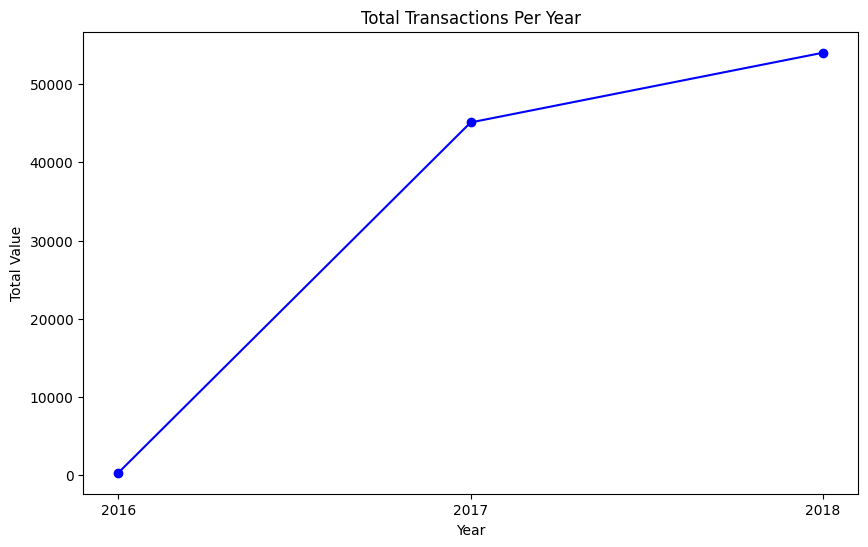

In [537]:
total_transactions_per_year['purchase_year'] = total_transactions_per_year['purchase_year'].astype(int)
plt.figure(figsize=(10, 6))
plt.plot(total_transactions_per_year['purchase_year'], total_transactions_per_year['order_id'], marker='o', color='b')
plt.title('Total Transactions Per Year')
plt.xlabel('Year')
plt.ylabel('Total Value')
plt.xticks(total_transactions_per_year['purchase_year'])
plt.show()

In [538]:
# Mengekspor hasil ke CSV
total_transactions_per_year.to_csv('total_transactions_per_year.csv', index=False)

Insight:

- Berdasarkan line plot yang ditampilkan,  jumlah transaksi  yang tercatat menunjukkan peningkatan yang signifikan setiap tahunnya. Pada tahun 2016,  jumlah transaksi. hanya mencapai 329 pesanan. Namun, pada tahun 2017,  jumlah transaksi. melonjak menjadi 45.101, dan pada tahun 2018,  jumlah transaksi. kembali meningkat menjadi 54.011.

### Pertanyaan 6:


In [539]:
total_revenue_per_year = valid_status_data.groupby('delivery_year')['payment_value'].sum().reset_index()
total_revenue_per_year

,delivery_year,payment_value
0,2016,46586.33
1,2017,6511147.83
2,2018,8864727.61


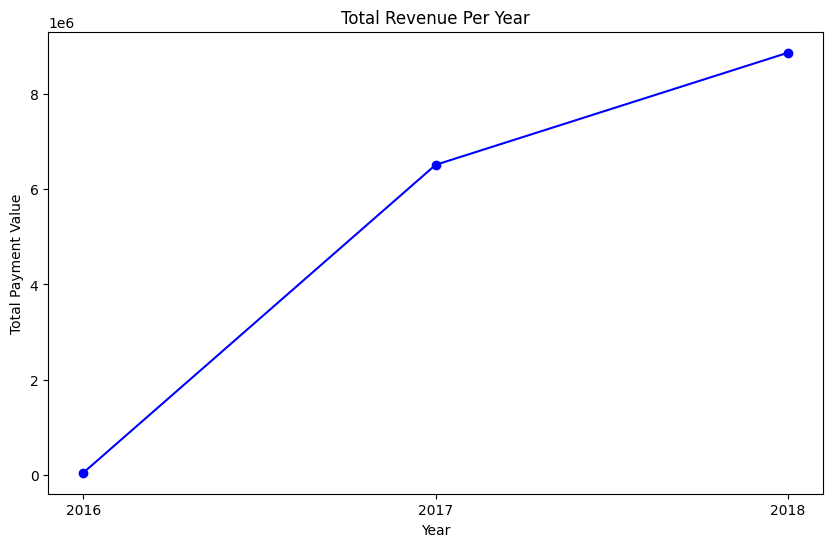

In [540]:
total_revenue_per_year['delivery_year'] = total_revenue_per_year['delivery_year'].astype(int)
plt.figure(figsize=(10, 6))
plt.plot(total_revenue_per_year['delivery_year'], total_revenue_per_year['payment_value'], marker='o', color='b')
plt.title('Total Revenue Per Year')
plt.xlabel('Year')
plt.ylabel('Total Payment Value')
plt.xticks(total_revenue_per_year['delivery_year'].astype(int))
plt.show()

In [541]:
# Mengekspor hasil ke CSV
total_revenue_per_year.to_csv('total_revenue_per_year.csv', index=False)

Insight:
- Berdasarkan line plot yang ditampilkan, terlihat adanya kenaikan yang signifikan dari tahun ke tahun. Pada tahun 2016, "total penjualan tercatat sebesar 46586.33, yang relatif kecil dibandingkan dengan tahun-tahun berikutnya. Pada tahun 2017, "total penjualan melonjak tajam menjadi 6.511.147,83, menunjukkan adanya peningkatan yang sangat besar dalam volume transaksi. Lalu pada tahun 2018, "total penjualan kembali meningkat menjadi 8.864.727,61

### Pertanyaan 7:


In [542]:
product_transaction_counts = order_product_detail.groupby('product_category_name_english')['order_id'].count().reset_index()
product_transaction_counts.rename(columns={"order_id": "total order"}, inplace=True)
product_transaction_counts

,product_category_name_english,total order
0,agro_industry_and_commerce,212
1,air_conditioning,297
2,art,209
3,arts_and_craftmanship,24
4,audio,364
...,...,...
66,stationery,2517
67,tablets_printing_image,83
68,telephony,4545
69,toys,4117


In [543]:
top_5_products = product_transaction_counts.sort_values(by="total order", ascending=False).head(5)
bottom_5_products = product_transaction_counts.sort_values(by="total order", ascending=True).head(5)

In [563]:
top_5_products.head()

,product_category_name_english,total order
7,bed_bath_table,11115
43,health_beauty,9670
65,sports_leisure,8641
39,furniture_decor,8334
15,computers_accessories,7827


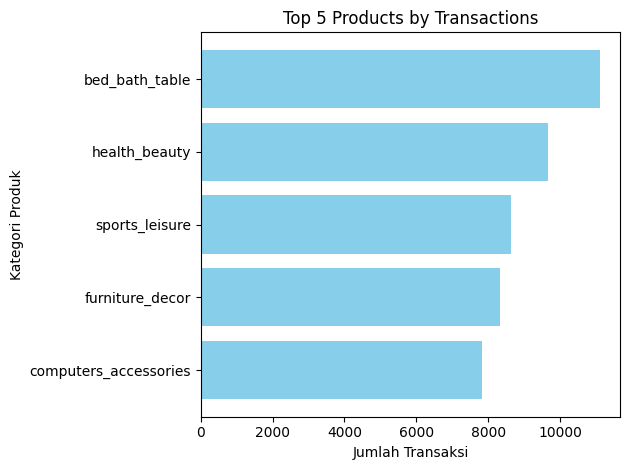

In [544]:
# Top 5 Products by Transactions
plt.barh(top_5_products['product_category_name_english'][::-1], top_5_products['total order'][::-1], color='skyblue')
plt.title('Top 5 Products by Transactions')
plt.xlabel('Jumlah Transaksi')
plt.ylabel('Kategori Produk')
plt.tick_params(axis='y', labelsize=10)
plt.tick_params(axis='x', labelsize=10)
#plt.grid(axis='x',, alpha=0.6)
plt.tight_layout()
plt.show()

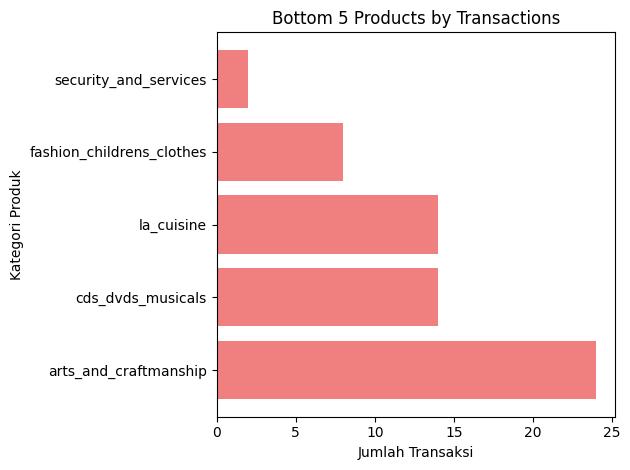

In [545]:
# Bottom 5 Products by Transactions
plt.barh(bottom_5_products['product_category_name_english'][::-1], bottom_5_products['total order'][::-1], color='lightcoral')
plt.title('Bottom 5 Products by Transactions')
plt.xlabel('Jumlah Transaksi')
plt.ylabel('Kategori Produk')
plt.tick_params(axis='y', labelsize=10)
plt.tick_params(axis='x', labelsize=10)
#plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Insight:

- Berdasarkan bar chart yang ditampilkan, Top 5 Produk dengan Jumlah Pesanan Terbanyak terdiri dari kategori Bed, Bath & Table, yang memiliki 11.115 pesanan, diikuti oleh Health & Beauty dengan 9.670 pesanan, Sports & Leisure dengan 8.641 pesanan, Furniture & Decor dengan 8.334 pesanan, dan Computers & Accessories dengan 7.827 pesanan. Kategori-kategori ini menunjukkan permintaan yang tinggi dari konsumen di berbagai segmen produk, terutama untuk kebutuhan rumah tangga dan kesehatan.
- Bottom 5 Produk dengan Jumlah Pesanan Terendah terlihat pada kategori Security & Services, yang hanya mencatatkan 2 pesanan, diikuti oleh Fashion for Children's Clothes dengan 8 pesanan, La Cuisine dan CDs, DVDs & Musicals masing-masing dengan 14 pesanan, serta Arts & Craftsmanship dengan 24 pesanan. Bar chart ini menggambarkan bahwa kategori-kategori ini memiliki jumlah pesanan yang jauh lebih sedikit, menunjukkan bahwa produk-produk tersebut kurang diminati atau memiliki pasar yang lebih kecil.

### Pertanyaan 8:

In [550]:
# Cek keterlambatan pesanan
valid_status_data['is_late'] = olist_orders['order_delivered_customer_date'] > olist_orders['order_estimated_delivery_date']
valid_status_data.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,delivery_year,delivery_month,delivery_day,is_late
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,credit_card,1.0,18.12,2017,10,10,False
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,3.0,voucher,1.0,2.00,2017,10,10,False
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2.0,voucher,1.0,18.59,2017,10,10,False
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0,boleto,1.0,141.46,2018,8,7,False
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1.0,credit_card,3.0,179.12,2018,8,17,False


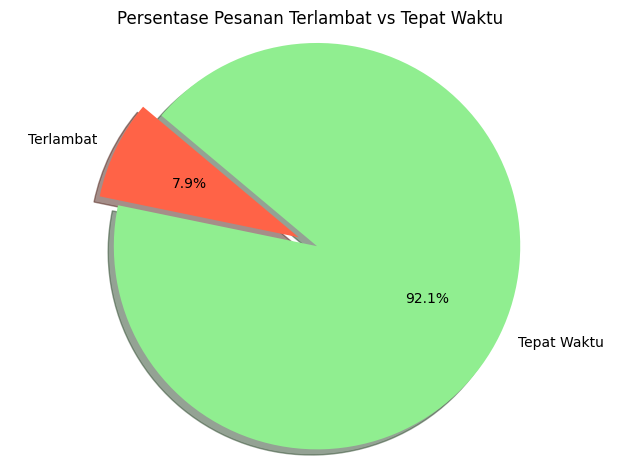

In [555]:
# Hitung jumlah pesanan yang terlambat dan tidak terlambat
total_orders_count = olist_orders.shape[0]
late_orders_count = valid_status_data['is_late'].sum()
on_time_orders_count = total_orders_count - late_orders_count

# Hitung persentase keterlambatan
late_percentage = (late_orders_count / total_orders_count) * 100
on_time_percentage = 100 - late_percentage

# Plot pie chart
labels = ['Terlambat', 'Tepat Waktu']
sizes = [late_percentage, on_time_percentage]
colors = ['#FF6347', '#90EE90']
explode = (0.1, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Persentase Pesanan Terlambat vs Tepat Waktu')
plt.axis('equal')
plt.tight_layout()
plt.show()

In [558]:
# Data untuk performa logistik

performa_logistik = pd.DataFrame({
    'status': ['Terlambat', 'Tepat Waktu'],
    'jumlah': [late_orders_count, on_time_orders_count],
    'persentase': [late_percentage, on_time_percentage]
})
performa_logistik.to_csv('performa_logistik1.csv', index=False)

**Insight:**
- Berdasarkan data yang ada, sekitar 92,1% pesanan berhasil dikirim tepat waktu, yang menunjukkan bahwa performa logistik berjalan dengan baik. Namun, sekitar 7,9% pesanan mengalami keterlambatan, yang menunjukkan adanya beberapa tantangan dalam sistem logistik yang perlu diperbaiki. Secara keseluruhan, meskipun ada sedikit keterlambatan, performa logistik dapat dikategorikan sangat baik

## Analisis Lanjutan


In [589]:
product_filter = 'bed_bath_table'

filtered_data = product_sales_by_demographics_1[product_sales_by_demographics_1['product_category_name_english'] == product_filter]
product_filter_title = product_filter.replace('_', ' ').title()

geolokasfig = px.scatter_geo(
    filtered_data,
    lat='geolocation_lat',
    lon='geolocation_lng',
    color='customer_state',
    hover_name='customer_city',
    title=f"Customer Distribution for {product_filter_title} Product",
    labels={'customer_state': 'State', 'customer_city': 'City'},
    template="plotly"
)

geolokasfig.update_geos(showland=True, landcolor='lightgray', visible=True)
geolokasfig.update_layout(
    title_font=dict(size=20),
    title_x=0.5,
    title_y=0.95,
    margin={"r":0,"t":50,"l":0,"b":0}
)
geolokasfig.show()

**Insight**

- Dengan menggunakan fitur distribusi geografis ini, tim marketing dapat membantu seller dan calon seller di Olist untuk melihat sejauh mana suatu produk sudah menjangkau berbagai state dan city. Fitur visualisasi distribusi geografis bisa menjadi daya tarik bagi calon seller di Olist. Dengan menunjukkan sejauh mana produk telah menjangkau berbagai wilayah (state dan city), calon seller dapat melihat potensi pasar yang lebih jelas. Visualisasi ini memberikan gambaran konkret tentang sebaran produk di berbagai daerah, yang bisa meningkatkan kepercayaan mereka bahwa Olist memiliki jangkauan yang luas dan potensial. Hal ini juga bisa mempertahakan seller dan mendorong calon seller untuk bergabung, karena mereka melihat peluang untuk memperluas pasar produk mereka ke wilayah yang lebih banyak

## Conclusion

- Terdapat 3.095 penjual yang terdaftar di Olist, yang tersebar di 611 kota dan 23 provinsi.
- Olist menyediakan 73 kategori produk yang tersedia, tanpa termasuk yang telah terjual.
- Pelanggan Olist tersebar di 27 provinsi dan 4.119 kota.
- Rata-rata skor ulasan yang diterima Olist adalah 4,09.
- Jumlah transaksi meningkat pesat setiap tahunnya. Pada 2016 tercatat 329 pesanan, meningkat tajam menjadi 45.101 pesanan pada 2017, dan mencapai 54.011 pesanan pada 2018.
- Total penjualan mengalami kenaikan setiap tahunnya, dari 46.586,33 pada 2016, menjadi 6.511.147,83 pada 2017, dan 8.864.727,61 pada 2018.
- Untuk kategori produk, 5 produk dengan jumlah pesanan terbanyak adalah Bed, Bath & Table (11.115 pesanan), Health & Beauty (9.670 pesanan), Sports & Leisure (8.641 pesanan), Furniture & Decor (8.334 pesanan), dan Computers & Accessories (7.827 pesanan). Sementara itu, produk dengan pesanan terendah termasuk Security & Services (2 pesanan), Fashion for Children’s Clothes (8 pesanan), dan beberapa kategori lain dengan pesanan sangat sedikit.
- Dari sisi pengiriman, 92,1% pesanan berhasil dikirim tepat waktu, sementara 7,9% mengalami keterlambatan. Meskipun ada beberapa tantangan logistik, secara keseluruhan, sistem pengiriman Olist dapat dikategorikan sangat baik.
- Fitur distribusi geografis memungkinkan tim marketing untuk membantu seller dan calon seller di Olist melihat sejauh mana produk mereka telah menjangkau berbagai wilayah, baik state maupun city. Visualisasi ini memberi gambaran nyata mengenai potensi pasar, yang dapat menarik calon seller untuk bergabung dan mempertahankan seller yang sudah ada, dengan keyakinan akan luasnya jangkauan pasar yang dapat mereka capai melalui Olist.